In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import IsolationForest

# Anamoly detection in Transaction

In [6]:
dataframe = pd.read_csv("D:/JupyterNotebooks/transaction_anomalies_dataset.csv")
dataframe.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [8]:
dataframe.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [14]:
dataframe.value_counts

<bound method DataFrame.value_counts of     Transaction_ID  Transaction_Amount  Transaction_Volume  \
0              TX0         1024.835708                   3   
1              TX1         1013.952065                   4   
2              TX2          970.956093                   1   
3              TX3         1040.822254                   2   
4              TX4          998.777241                   1   
..             ...                 ...                 ...   
995          TX995          901.138758                   3   
996          TX996          928.962516                   4   
997          TX997          950.921600                   2   
998          TX998          933.291962                   4   
999          TX999          968.289340                   3   

     Average_Transaction_Amount  Frequency_of_Transactions  \
0                    997.234714                         12   
1                   1020.210306                          7   
2                    989.4966

In [15]:
dataframe.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


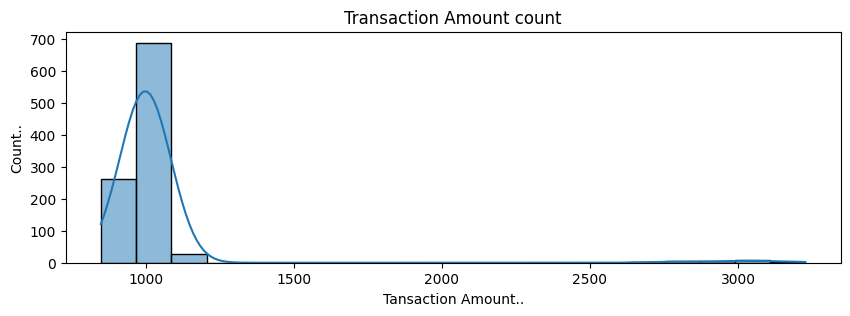

In [26]:
#plot a histplot between Transaction amount and count
plt.figure(figsize=(10,3))
sns.histplot(data=dataframe,x=dataframe['Transaction_Amount'], bins=20,kde=True)
plt.title("Transaction Amount count")
plt.xlabel("Tansaction Amount..")
plt.ylabel("Count..")
plt.show()

<bound method Figure.show of <Figure size 1000x500 with 1 Axes>>

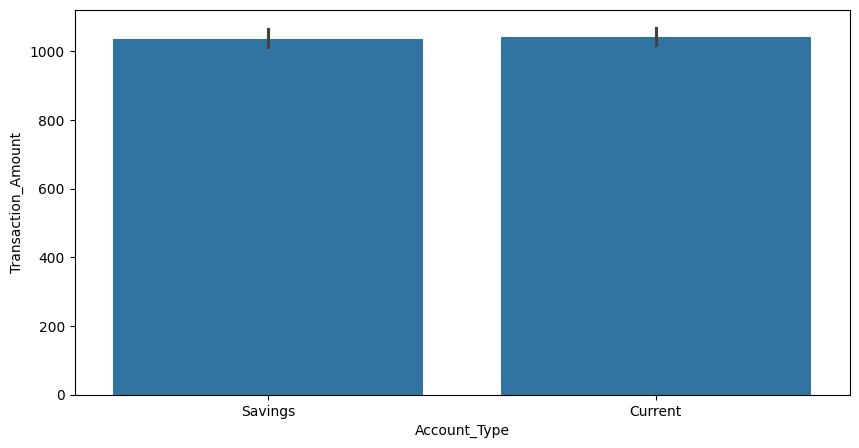

In [30]:
#Now let’s have a look at the distribution of transactions amount by account type:
figure = plt.figure(figsize=(10,5))
sns.barplot(data=dataframe, y="Transaction_Amount",x="Account_Type")
figure.show

<bound method Figure.show of <Figure size 1500x500 with 1 Axes>>

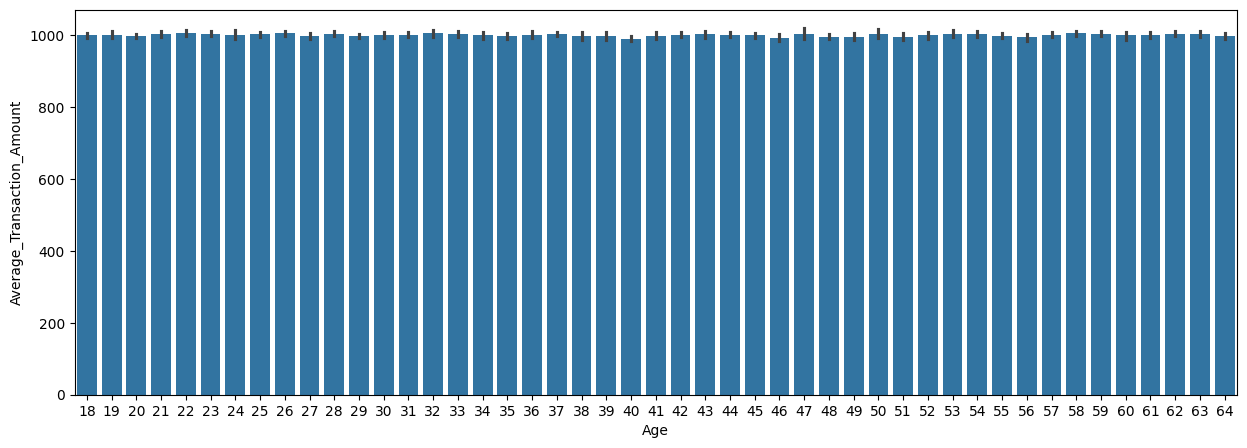

In [33]:
#Now let’s have a look at the average transaction amount by age:
figure = plt.figure(figsize=(15,5))
sns.barplot(data=dataframe, x="Age",y="Average_Transaction_Amount",hue_order='Account_Type')
figure.show

<bound method Figure.show of <Figure size 1000x500 with 1 Axes>>

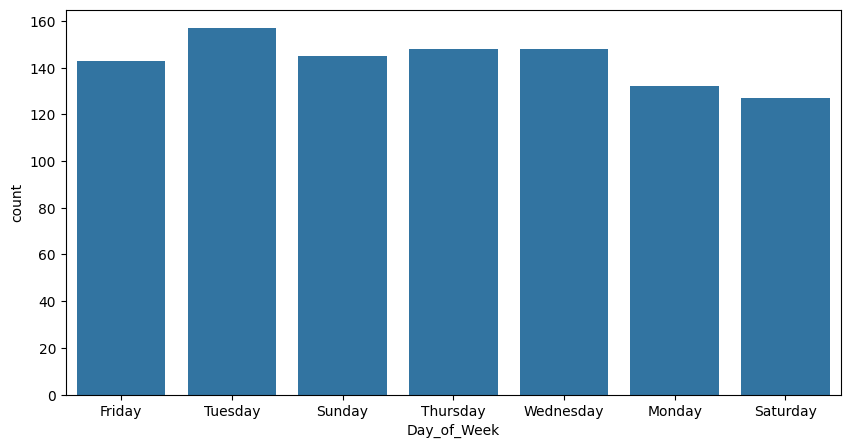

In [34]:
#There’s no difference in the average transaction amount by age. Now let’s have a look at the count of transactions by day of the week:
figure = plt.figure(figsize=(10,5))
sns.countplot(data=dataframe, x="Day_of_Week")
figure.show

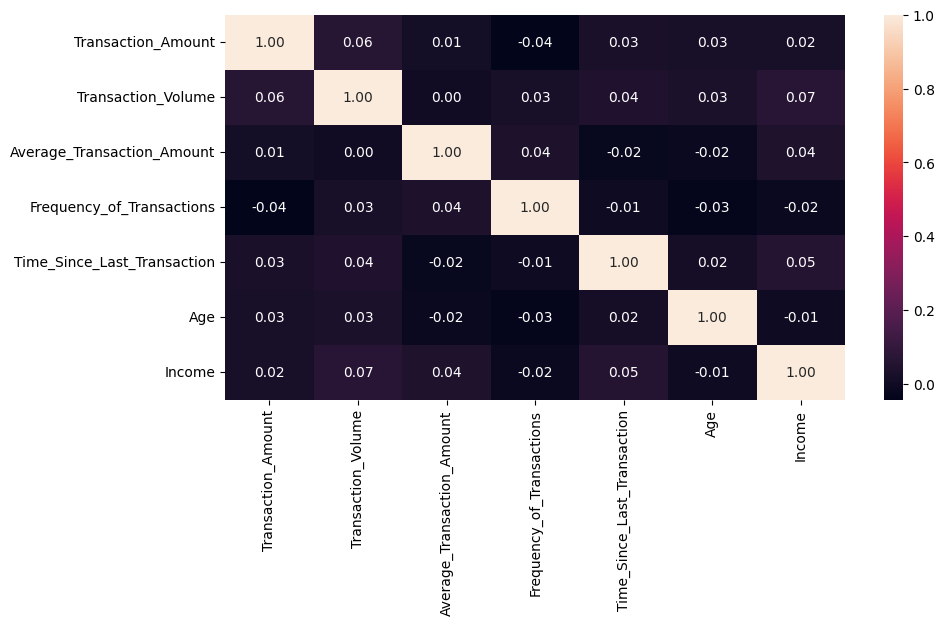

In [41]:
#Now let’s have a look at the correlation between all the columns in the data:
plt.figure(figsize=(10,5))
sns.heatmap(dataframe[['Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Age', 'Income',]].corr(),annot=True,fmt='.2f')
plt.show()

In [36]:
dataframe.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type'],
      dtype='object')

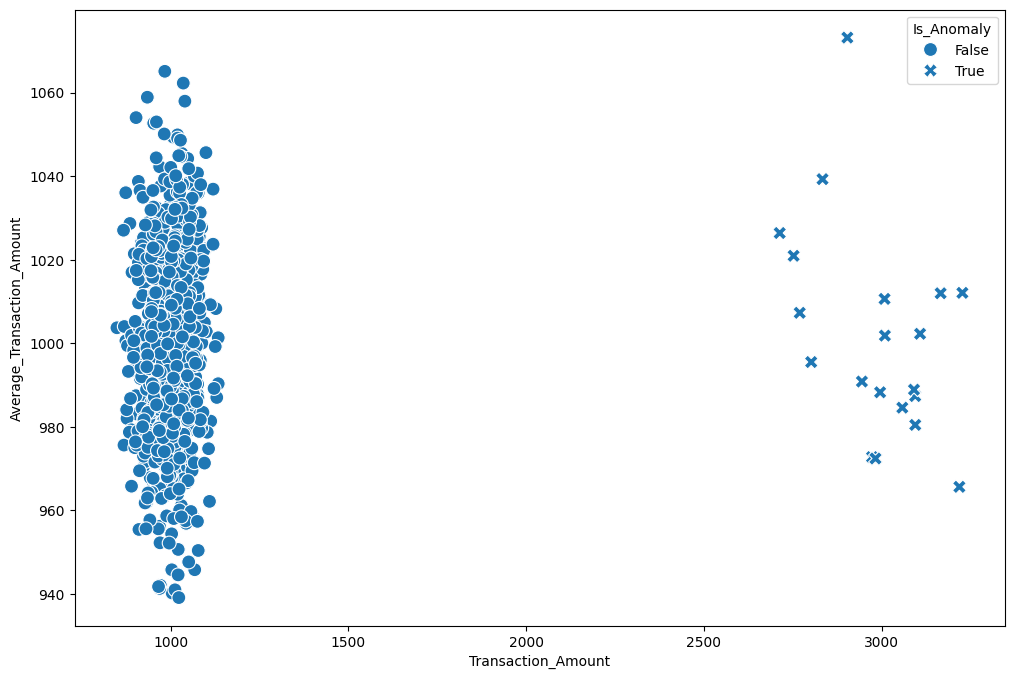

In [44]:
#Now here’s how we can visualize anomalies in the data:

# Calculate mean and standard deviation of Transaction Amount
mean_amount = dataframe['Transaction_Amount'].mean()
std_amount = dataframe['Transaction_Amount'].std()

# Define the anomaly threshold (2 standard deviations from the mean)
anomaly_threshold = mean_amount + 2 * std_amount

# Flag anomalies
dataframe['Is_Anomaly'] = dataframe['Transaction_Amount'] > anomaly_threshold


plt.figure(figsize=(12,8))
sns.scatterplot(x='Transaction_Amount',y='Average_Transaction_Amount',data=dataframe,style='Is_Anomaly',s=100)
plt.show()

#Now let’s calculate the number of anomalies in the data to find the ratio of anomalies in the data, which will be useful while using anomaly detection algorithms like isolation forest:

In [48]:
# Calculate the number of anomalies
num_anomalies = dataframe['Is_Anomaly'].sum()

# Calculate the total number of instances in the dataset
total_instances = dataframe.shape[0]

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


#Now here’s how we can train a Machine Learning model for detecting anomalies:

In [52]:
#select relevant features
relevant_features = ['Transaction_Amount','Average_Transaction_Amount','Frequency_of_Transactions']

#devide into x, y
x= dataframe[relevant_features]
y= dataframe['Is_Anomaly']

# Split data into train and test sets
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#model fitting
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(x_train,y_train)

IsolationForest(contamination=0.02, random_state=42)

#Here we are training an anomaly detection model using the Isolation Forest algorithm. First, we selected the relevant features for detection, namely Transaction_Amount, Average_Transaction_Amount, and Frequency_of_Transactions. 

#We split the dataset into features (X) and the target variable (y), where X contains the selected features and y contains the binary labels indicating whether an instance is an anomaly or not. Then, we further split the data into training and testing sets using an 80-20 split ratio. Next, we created an Isolation Forest model with a specified contamination parameter of 0.02 (indicating the expected ratio of anomalies) and a random seed for reproducibility. The model is then trained on the training set (X_train).

In [54]:
#Now let’s have a look at the performance of this anomaly detection model:
y_pred = model.predict(x_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [55]:
#Finally, here’s how we can use our trained model to detect anomalies:

In [56]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)
user_df

#1024.835708	997.234714 12

Enter the value for 'Transaction_Amount':  1024.835708
Enter the value for 'Average_Transaction_Amount':  997.234714
Enter the value for 'Frequency_of_Transactions':  12


,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions
0,1024.835708,997.234714,12.0


In [57]:
# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)
user_anomaly_pred

array([1])

In [58]:
# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

No anomaly detected: This transaction is normal.
